In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing_owners = pd.read_csv('fema_data/chi_housing_assistance_owners.csv')
housing_owners['zipCode'] = housing_owners['zipCode'].fillna(0).astype(int).astype(str)
housing_renters = pd.read_csv('fema_data/chi_housing_assistance_renters.csv')
housing_renters['zipCode'] = housing_renters['zipCode'].fillna(0).astype(int).astype(str)
housing_renters.head()

,disasterNumber,incidentType,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,...,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,hash,lastRefresh,declarationDate,title,incidentBeginDate,incidentEndDate
0,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60651,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0c2848a1b3d37ca216e40d7266d70007,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
1,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60641,124.0,121.0,121.0,0.0,...,60.0,9.0,1.0,1.0,2c28933c6fcfbd4a651ce9948460ccfd,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
2,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60609,939.0,903.0,903.0,0.0,...,514.0,32.0,5.0,1.0,45fd7be16116532bcb712b0196adfbd2,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
3,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60827,148.0,141.0,141.0,0.0,...,57.0,2.0,0.0,0.0,7001b15646afa6bc79214521253ef5c5,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
4,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60630,11.0,11.0,11.0,0.0,...,1.0,0.0,0.0,0.0,23567187d20f65ae2ba4bb0849a91e0a,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00


In [3]:
housing_owners.shape

(231, 30)

In [4]:
housing_renters.shape

(179, 27)

In [5]:
housing_owners.dtypes

disasterNumber                             float64
incidentType                                object
state                                       object
county                                      object
city                                        object
zipCode                                     object
validRegistrations                         float64
averageFemaInspectedDamage                 float64
totalInspected                             float64
totalDamage                                float64
noFemaInspectedDamage                      float64
femaInspectedDamageBetween1And10000        float64
femaInspectedDamageBetween10001And20000    float64
femaInspectedDamageBetween20001And30000    float64
femaInspectedDamageGreaterThan30000        float64
approvedForFemaAssistance                  float64
totalApprovedIhpAmount                     float64
repairReplaceAmount                        float64
rentalAmount                               float64
otherNeedsAmount               

In [6]:
housing_renters.dtypes

disasterNumber                  float64
incidentType                     object
state                            object
county                           object
city                             object
zipCode                          object
validRegistrations              float64
totalInspected                  float64
totalInspectedWithNoDamage      float64
totalWithModerateDamage         float64
totalWithMajorDamage            float64
totalWithSubstantialDamage      float64
approvedForFemaAssistance       float64
totalApprovedIhpAmount          float64
repairReplaceAmount             float64
rentalAmount                    float64
otherNeedsAmount                float64
approvedBetween1And10000        float64
approvedBetween10001And25000    float64
approvedBetween25001AndMax      float64
totalMaxGrants                  float64
hash                             object
lastRefresh                      object
declarationDate                  object
title                            object


In [7]:
owner_approved_zip = housing_owners.groupby(['zipCode'])['approvedForFemaAssistance'].sum()
owner_approved_df = pd.DataFrame(owner_approved_zip).reset_index()
owner_approved_df = owner_approved_df.dropna()
owner_approved_df = owner_approved_df.sort_values(by='approvedForFemaAssistance',ascending=False)
owner_approved_df.head()

,zipCode,approvedForFemaAssistance
32,60628,7769.0
24,60619,7464.0
25,60620,6950.0
22,60617,6574.0
33,60629,6533.0


In [8]:
renter_approved_zip = housing_renters.groupby(['zipCode'])['approvedForFemaAssistance'].sum()
renter_approved_df = pd.DataFrame(renter_approved_zip).reset_index()
renter_approved_df = renter_approved_df.dropna()
renter_approved_df = renter_approved_df.sort_values(by='approvedForFemaAssistance',ascending=False)
renter_approved_df.head()

,zipCode,approvedForFemaAssistance
29,60628,2827.0
21,60620,2307.0
20,60619,2173.0
49,60651,2135.0
36,60636,2032.0


In [9]:
both_approved_df = owner_approved_df.merge(renter_approved_df, on='zipCode')
both_approved_df['approvedForFemaAssistance'] = both_approved_df['approvedForFemaAssistance_x'] + both_approved_df['approvedForFemaAssistance_y']
both_approved_df = both_approved_df[['zipCode', 'approvedForFemaAssistance']]
both_approved_df = both_approved_df.sort_values(by='approvedForFemaAssistance', ascending=False)
both_approved_df.head()

,zipCode,approvedForFemaAssistance
0,60628,10596.0
1,60619,9637.0
2,60620,9257.0
4,60629,8299.0
3,60617,7961.0


In [10]:
flood_zip_df = pd.read_csv('311_data/wib_calls_311_zip.csv')
flood_zip_df = flood_zip_df[flood_zip_df.columns.values[1:]]
flood_zip_stack = pd.DataFrame(flood_zip_df.stack()).reset_index()
flood_zip_stack = flood_zip_stack.rename(columns={'level_0':'Created Date','level_1':'Zip Code',0:'Count Calls'})
flood_zip_sum = flood_zip_stack.groupby(['Zip Code'])['Count Calls'].sum()
flood_zip_sum = flood_zip_sum.reset_index()
flood_zip_sum = flood_zip_sum.sort_values(by='Count Calls',ascending=False)
flood_zip_sum.head()

,Zip Code,Count Calls
27,60628,11671.0
19,60619,10758.0
28,60629,9902.0
17,60617,9526.0
20,60620,9362.0


In [11]:
flood_zips = flood_zip_sum['Zip Code'].unique()
fema_approved_zip_df = both_approved_df.loc[both_approved_df['zipCode'].isin(flood_zips)].copy()
fema_approved_zip_df.shape

(52, 2)

## FEMA Approved and 311 Comparison

Using all approvedistrations earlier didn't work, but there is a much clearer relationship when looking at approved claims rather than all valid approved registrations.

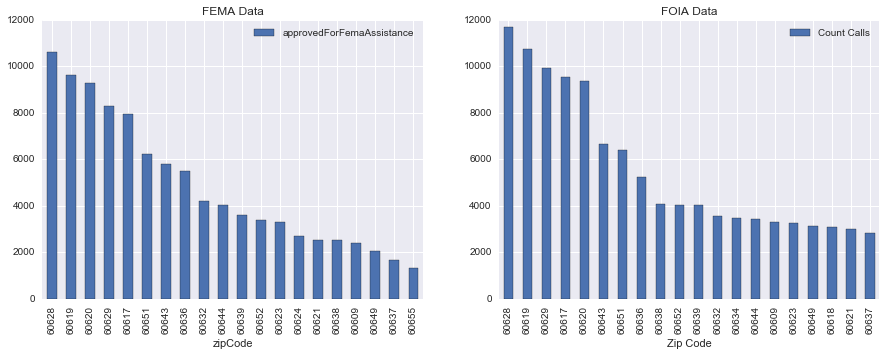

In [13]:
fig, axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15, 5]
fema_approved_zip_df[:20].plot(title='FEMA Data', ax=axs[0], kind='bar',x='zipCode',y='approvedForFemaAssistance')
flood_zip_sum[:20].plot(title='FOIA Data', ax=axs[1], kind='bar',x='Zip Code',y='Count Calls')

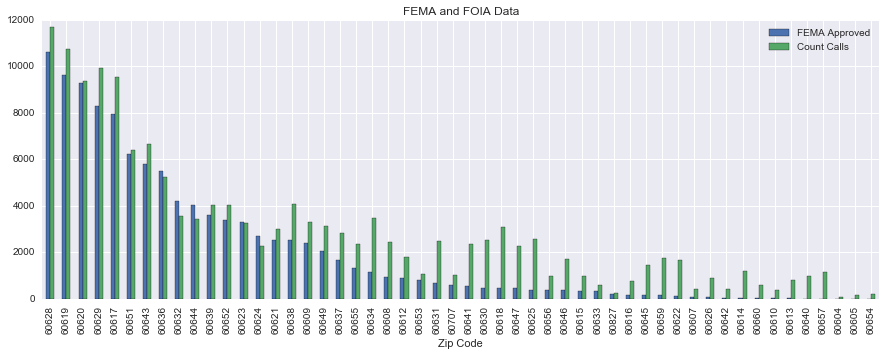

In [14]:
fema_flood_zip = pd.DataFrame()
fema_flood_zip[['Zip Code', 'FEMA Approved']] = fema_approved_zip_df.copy()
fema_flood_zip = fema_flood_zip.merge(flood_zip_sum, on='Zip Code')
fema_flood_zip.plot(title='FEMA and FOIA Data', x='Zip Code', y=['FEMA Approved', 'Count Calls'], kind='bar')

### FEMA Events

The WIB call data covers all calls from 2000 through the present, but the earliest event in the FEMA data is in 2007. Looking at the same information, but with calls starting in 2007.

In [15]:
wib_07_df = pd.read_csv('311_data/wib_calls_311_zip.csv')
wib_07_df['Created Date'] = pd.to_datetime(wib_07_df['Created Date'])
wib_07_df = wib_07_df.set_index(wib_07_df['Created Date'])
wib_07_df = wib_07_df['2007-01-01':][wib_07_df.columns.values[2:]]
wib_07_df.head()

,60601,60602,60603,60604,60605,60606,60607,60608,60609,60610,...,60654,60655,60656,60657,60659,60660,60661,60666,60707,60827
Created Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-01-02,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,0
2007-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007-01-04,0,0,0,0,0,0,0,0,3,0,...,1,3,0,0,0,0,0,0,1,0
2007-01-05,0,0,0,0,0,0,1,1,1,0,...,0,1,1,0,0,0,0,0,0,0


In [16]:
wib_07_stack = pd.DataFrame(wib_07_df.stack()).reset_index()
wib_07_stack = wib_07_stack.rename(columns={'level_0':'Created Date','level_1':'Zip Code',0:'Count Calls'})
wib_07_sum = wib_07_stack.groupby(['Zip Code'])['Count Calls'].sum()
wib_07_sum = wib_07_sum.reset_index()
wib_07_sum = wib_07_sum.sort_values(by='Count Calls',ascending=False)
wib_07_sum.head()

,Zip Code,Count Calls
26,60628,6893
18,60619,6575
27,60629,6215
16,60617,5771
19,60620,5518


In [17]:
wib_07_zips = wib_07_sum['Zip Code'].unique()
fema_approved_wib_df = both_approved_df.loc[both_approved_df['zipCode'].isin(wib_07_zips)].copy()

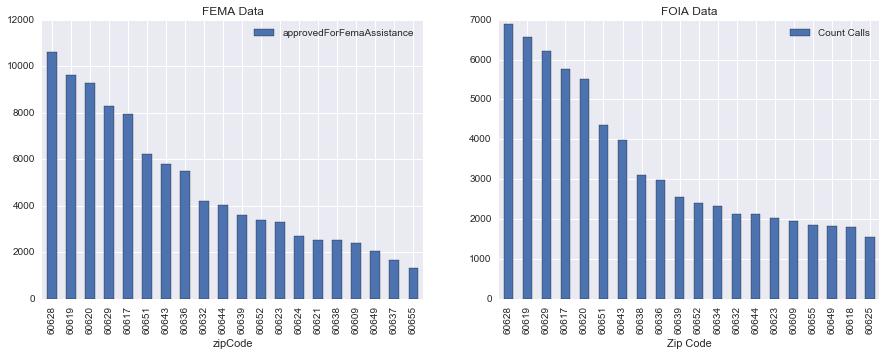

In [18]:
fig, axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [15, 5]
fema_approved_wib_df[:20].plot(title='FEMA Data', ax=axs[0], kind='bar',x='zipCode',y='approvedForFemaAssistance')
wib_07_sum[:20].plot(title='FOIA Data', ax=axs[1], kind='bar',x='Zip Code',y='Count Calls')

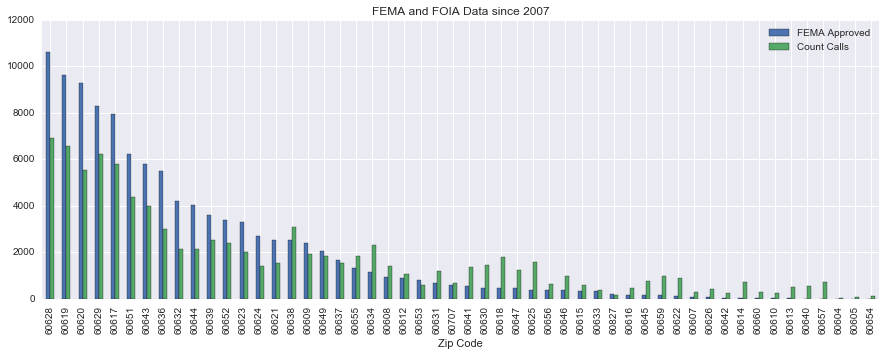

In [20]:
fema_wib_zip = pd.DataFrame()
fema_wib_zip[['Zip Code', 'FEMA Approved']] = fema_approved_wib_df.copy()
fema_wib_zip = fema_wib_zip.merge(wib_07_sum, on='Zip Code')
fema_wib_zip.plot(title='FEMA and FOIA Data since 2007', x='Zip Code', y=['FEMA Approved', 'Count Calls'], kind='bar')

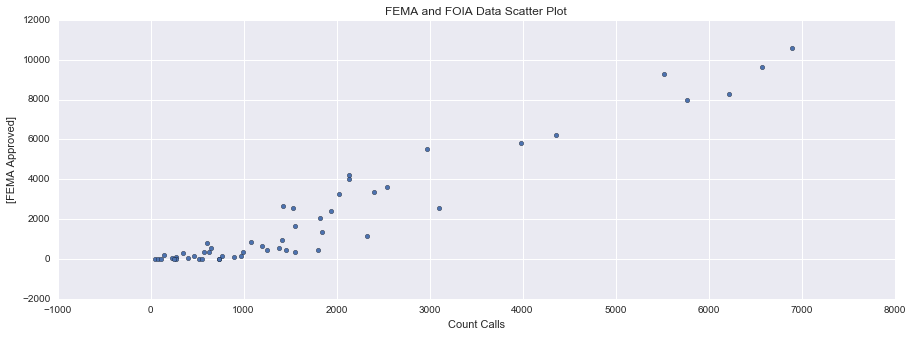

In [21]:
fema_wib_zip.plot(title='FEMA and FOIA Data Scatter Plot', x='Count Calls', y=['FEMA Approved'], kind='scatter')

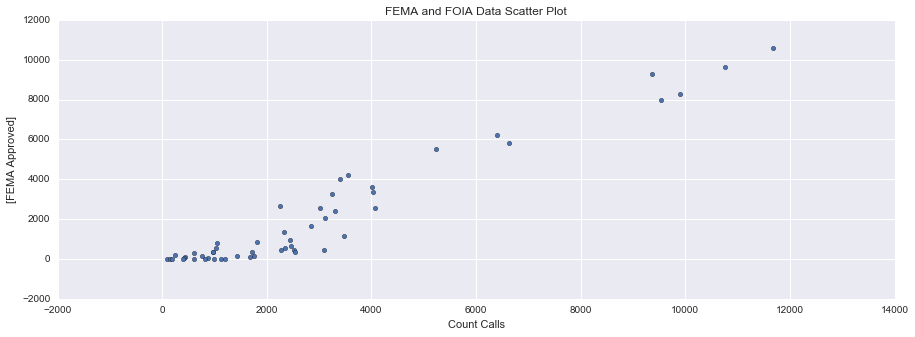

In [22]:
fema_flood_zip.plot(title='FEMA and FOIA Data Scatter Plot', x='Count Calls', y=['FEMA Approved'], kind='scatter')

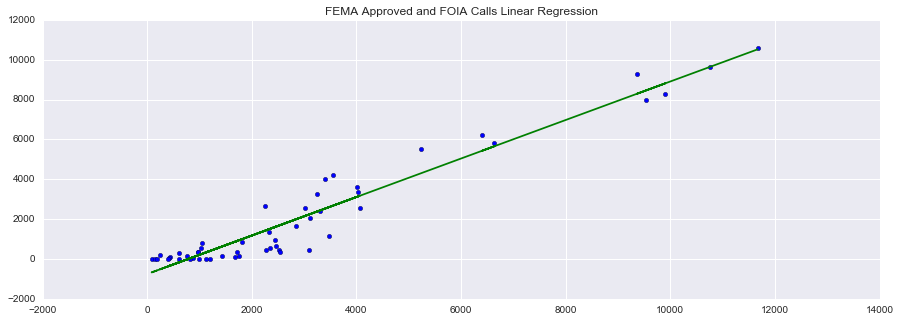

Variance score: 0.93


In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
fema_lr = fema_flood_zip[["FEMA Approved", "Count Calls"]]

x_data = [[x] for x in fema_lr["Count Calls"].values]
y_data = [[y] for y in fema_lr["FEMA Approved"].values]
lm.fit(x_data, y_data)
y_lr = lm.predict(x_data)

plt.plot(x_data, y_lr, 'g')
plt.scatter(fema_lr['Count Calls'].values, fema_lr['FEMA Approved'].values)
plt.title("FEMA Approved and FOIA Calls Linear Regression")
plt.show()

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(x_data, y_data))